In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

In [2]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

## Part 1: Temperatures

In the following analysis, we will investigate one of the 21st century's most prominent issues: climate change. While the details of climate science are beyond the scope of this course, we can start to learn about climate change just by analyzing public records of different cities' temperature and precipitation over time.

We will analyze a collection of historical daily temperature and precipitation measurements from weather stations in 210 U.S. cities. The dataset was compiled by Yuchuan Lai and David Dzombak [1]; a description of the data from the original authors and the data itself is available [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488). 

[1] Lai, Yuchuan; Dzombak, David (2019): Compiled historical daily temperature and precipitation data for selected 210 U.S. cities. Carnegie Mellon University. Dataset.

### Part 1, Section 1: Cities

Run the following cell to load information about the `cities` and preview the first few rows.

In [3]:
cities = Table.read_table('city_info.csv', index_col=0)
cities.show(3)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31


The `cities` table has one row per weather station and the following columns:

1. `"Name"`: The name of the US city
2. `"ID"`: The unique identifier for the US city
3. `"Lat"`: The latitude of the US city (measured in degrees of latitude)
4. `"Lon"`: The longitude of the US city (measured in degrees of longitude)
4. `"Stn.Name"`: The name of the weather station in which the data was collected
5. `"Stn.stDate"`: A string representing the date of the first recording at that particular station
6. `"Stn.edDate"`: A string representing the date of the last recording at that particular station

The data lists the weather stations at which temperature and precipitation data were collected. Note that although some cities have multiple weather stations, only one is collecting data for that city at any given point in time. Thus, we are able to just focus on the cities themselves.

<!-- BEGIN QUESTION -->

**Question 1.1.1:** In the cell below, produce a scatter plot that plots the latitude and longitude of every city in the `cities` table so that the result places northern cities at the top and western cities at the left.

*Note*: It's okay to plot the same point multiple times!

*Hint*: A latitude is the set of horizontal lines that measures distances *north or south* of the equator. A longitude is the set of vertical lines that measures distances *east or west* of the prime meridian.

<!--
BEGIN QUESTION
name: q1_1_1
manual: true
-->

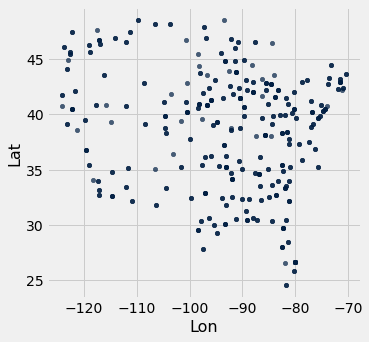

In [4]:
cities_sorted = cities.sort('Lat', descending = False).sort('Lon', descending = False)
cities_sorted.scatter('Lon','Lat')

<!-- END QUESTION -->



These cities are all within the continental U.S., and so the general shape of the U.S. should be visible in your plot. The shape will appear distorted compared to most maps for two reasons: the scatter plot is square even though the U.S. is wider than it is tall, and this scatter plot is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection) of the spherical Earth. A geographical map of the same data uses the common [Pseudo-Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection).

In [5]:
# Just run this cell
Marker.map_table(cities.select('Lat', 'Lon', 'Name').relabeled('Name', 'labels'))

<!-- BEGIN QUESTION -->

**Question 1.1.2** Does it appear that these city locations are sampled uniformly at random from all the locations in the U.S.? Why or why not?

<!--
BEGIN QUESTION
name: q1_1_2
manual: true
-->

Yes, all cities are sampled uniformly from all locations in the US. The map shows that cities are more dense on the east coast, but that is because the east coast is more dense and more populated than the west coast thus the chance of  cities being drawn from the East Coast is greater. Thus, overall we can conclude that we have sampled uniformly from all locations in the US.

<!-- END QUESTION -->

**Question 1.1.3:** Assign `num_unique_cities` to the number of unique cities that appear in the `cities` table.

<!--
BEGIN QUESTION
name: q1_1_3
manual: false
points:
 - 0
 - 0
 - 4
-->

In [6]:
num_unique_cites = cities.group("Name").num_rows


# Do not change this line
print(f"There are {num_unique_cites} unique cities that appear within our dataset.")

There are 210 unique cities that appear within our dataset.


In [7]:
grader.check("q1_1_3")

q1_1_3 results: All test cases passed!

In order to investigate further, it will be helpful to determine what region of the United States each city was located in: Northeast, Northwest, Southeast, or Southwest. For our purposes, we will be using the following geographical boundaries:

<img src= "usa_coordinates.png" alt="USA Coordinate Map" width="600"/>

1. A station is located in the `"Northeast"` region if its latitude is above or equal to 40 degrees and its longtitude is greater than or equal to -100 degrees.
2. A station is located in the `"Northwest"` region if its latitude is above or equal to 40 degrees and its longtitude is less than -100 degrees.
3. A station is located in the `"Southeast"` region if its latitude is below 40 degrees and its longtitude is greater than or equal to -100 degrees.
4. A station is located in the `"Southwest"` region if its latitude is below 40 degrees and its longtitude is less than -100 degrees.

**Question 1.1.4**: Define the `coordinates_to_region` function below. It should take in two arguments, a city's latitude (`lat`) and longitude (`lon`) coordinates, and output a string representing the region it is located in.

<!--
BEGIN QUESTION
name: q1_1_4
manual: false
points:
 - 1
 - 0.5
 - 0.5
 - 0.5
 - 0.5
 - 0.5
 - 0.5
-->

In [8]:
longitude_array=cities.column('Lon')
latitude_array=cities.column('Lat')

def coordinates_to_region(lat, lon):
    #cities.where('Lat', are.above_or_equal_to(40)).where('Lon',are.above_or_equal_to(-100))
    cities.where('Lat', lat).where('Lon',lon)
    if lat>=40 and lon>= -100:
        return 'Northeast'
    if lat>=40 and lon<=-100:
        return 'Northwest'
    if lat<40 and lon>=-100:
        return 'Southeast'
    if lat<40 and lon<-100:
        return "Southwest"

coordinates_to_region(42.8153, -108.726)

'Northwest'

In [9]:
grader.check("q1_1_4")

q1_1_4 results: All test cases passed!

**Question 1.1.5**: Add a new column in `cities` labeled `Region` that contains the region in which the city is located. For full credit, you must use the `coordinates_to_region` function you defined rather than reimplementing its logic.

<!--
BEGIN QUESTION
name: q1_1_5
manual: false
points:
 - 0
 - 0
 - 1
 - 1
 - 2
-->

In [10]:
regions_array = cities.apply(coordinates_to_region, 'Lat', 'Lon')
cities = cities.with_column('Region', regions_array)
cities.show(5)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Region
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28,Northwest
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31,Northwest
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31,Northeast


In [11]:
grader.check("q1_1_5")

q1_1_5 results: All test cases passed!

To confirm that you've defined your `coordinates_to_region` function correctly and successfully added the `Region` column to the `cities` table, run the following cell. Each region should have a different color in the result.

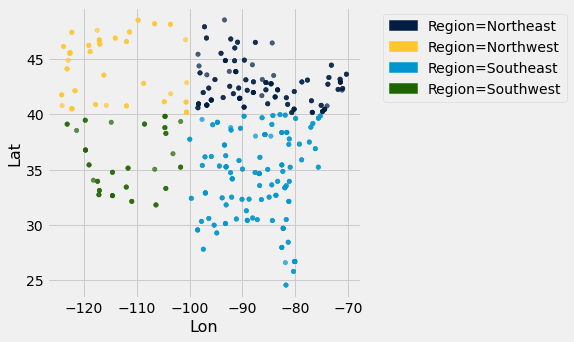

In [12]:
# Just run this cell
cities.scatter("Lon", "Lat", group="Region")

**Challenge Question 1.1.6 (OPTIONAL, ungraded)**: Create a new table called `cities_nearest`. It should contain the same columns as the `cities` table and an additional column called `"Nearest"` that contains the **name of the nearest city** that is in a different region from the city described by the row.

To approximate the distance between two cities, take the square root of the sum of the squared difference between their latitudes and the square difference between their longitudes. Don't use a `for` statement; instead, use the `apply` method and array arithmetic.

*Hint*: We have defined a `distance` function for you, which can be called on numbers `lat0` and `lon0` and arrays `lat1` and `lon1`.

In [13]:
def distance(lat0, lon0, lat1, lon1):
    "Approximate the distance between point (lat0, lon0) and (lat1, lon1) pairs in the arrays."
    return np.sqrt((lat0 - lat1) * (lat0 - lat1) + (lon0 - lon1) * (lon0 - lon1))

...

cities_nearest = ...
# Note: remove the comment(#) on the next line if you choose to do this question
#cities_nearest.show(5)

### Part 1, Section 2: Welcome to Phoenix, Arizona

Each city has a different CSV file full of daily temperature and precipitation measurements. The file for Phoenix, Arizona is included with this project as `phoenix.csv`. The files for other cities can be downloaded [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488) by matching them to the ID of the city in the `cities` table.

Since Phoenix is located on the upper edge of the Sonoran Desert, it has some impressive temperatures.

Run the following cell to load in the `phoenix` table. It has one row per day and the following columns:

1. `"Date"`: The date (a string) representing the date of the recording in **YYYY-MM-DD** format
2. `"tmax"`: The maximum temperature for the  day (°F)
3. `"tmin"`: The minimum temperature for the day (°F)
4. `"prcp"`: The recorded precipitation for the day (inches)

In [14]:
phoenix = Table.read_table("phoenix.csv", index_col=0)
phoenix.show(3)

Date,tmax,tmin,prcp
1896-01-01,66,30,0
1896-01-02,64,30,0
1896-01-03,68,30,0


**Question 1.2.1:** Assign the variable `largest_2010_range_date` to the date of the **largest temperature range** in Phoenix, Arizona for any day between January 1st, 2010 and December 31st, 2010. Your answer should be a string in the "YYYY-MM-DD" format. Feel free to use as many lines as you need. A temperature range is calculated as the difference between the max and min temperatures for the day.

*Hint*: To limit the values in a column to only those that *contain* a certain string, pick the right `are.` predicate from the [Python Reference Sheet](http://data8.org/python-reference/python-reference.html).

*Note:* Do **not** re-assign the `phoenix` variable; please use the `phoenix_with_ranges_2010` variable instead.

<!--
BEGIN QUESTION
name: q1_2_1
manual: false
points:
 - 0
 - 4
-->

In [15]:
phoenix_with_ranges_2010 = phoenix.with_column('Range', phoenix.column('tmax')-phoenix.column('tmin'))
largest_2010_range_date = phoenix_with_ranges_2010.sort('Range', descending=True).column('Date').item(0)
largest_2010_range_date

'1917-06-13'

In [16]:
grader.check("q1_2_1")

q1_2_1 results: All test cases passed!

We can look back to our `phoenix` table to check the temperature readings for our `largest_2010_range_date` to see if anything special is going on. Run the cell below to find the row of the `phoenix` table that corresponds to the date we found above. 

In [17]:
# Just run this cell
phoenix.where("Date", largest_2010_range_date)

Date,tmax,tmin,prcp
1917-06-13,107,59,0


ZOO WEE MAMA! Look at the maximum temperature for that day. That's hot.

The function `extract_year_from_date` takes a date string in the **YYYY-MM-DD** format and returns an integer representing the **year**. The function `extract_month_from_date` takes a date string and returns a string describing the month. Run this cell, but you do not need to understand how this code works or edit it.

In [18]:
# Just run this cell
import calendar

def extract_year_from_date(date):
    """Returns an integer corresponding to the year of the input string's date."""
    return int(date[:4])

def extract_month_from_date(date):
    "Return an abbreviation of the name of the month for a string's date."
    month = date[5:7]
    return f'{month} ({calendar.month_abbr[int(date[5:7])]})'


# Example
print('2022-04-01 has year', extract_year_from_date('2022-04-01'),
      'and month', extract_month_from_date('2022-04-01'))

2022-04-01 has year 2022 and month 04 (Apr)


**Question 1.2.2:** Add two new columns called `Year` and `Month` to the `phoenix` table that contain the year as an **integer** and the month as a **string** (such as `"04 (Apr)"`) for each day, respectively. 

*Note*: The functions above may be helpful!

<!--
BEGIN QUESTION
name: q1_2_2
manual: false
points:
 - 0
 - 0
 - 1
 - 1
 - 1
 - 1
-->

In [19]:
years_array = phoenix.apply(extract_year_from_date, 'Date')
months_array = phoenix.apply(extract_month_from_date, 'Date')
phoenix = phoenix.with_columns('Year', years_array, 'Month', months_array)
phoenix.show(5)

Date,tmax,tmin,prcp,Year,Month
1896-01-01,66,30,0,1896,01 (Jan)
1896-01-02,64,30,0,1896,01 (Jan)
1896-01-03,68,30,0,1896,01 (Jan)
1896-01-04,69,34,0,1896,01 (Jan)
1896-01-05,70,46,0,1896,01 (Jan)


In [20]:
grader.check("q1_2_2")

q1_2_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.3:** Using the `phoenix` table, create an overlaid line plot of the **average maximum temperature** and **average minimum temperature** for each year between 1900 and 2020 (inclusive). 

*Hint:* To draw a line plot with more than one line, call `plot` on the column label of the x-axis values and all other columns will be treated as y-axis values.

<!--
BEGIN QUESTION
name: q1_2_3
manual: true
-->

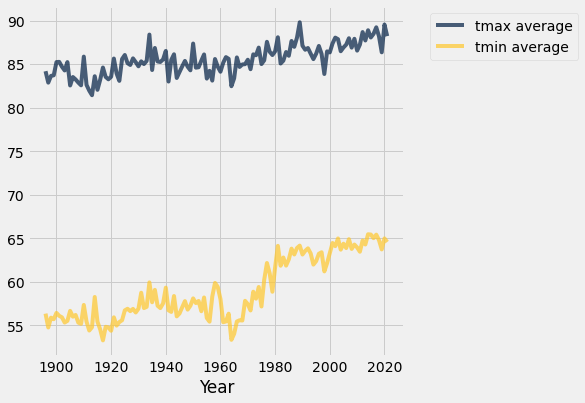

In [21]:
phoenix_average = phoenix.group('Year',np.average)
phoenix_new_average=phoenix_average.drop('Date average', 'prcp average', 'Month average')
phoenix_new_average.plot('Year')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.2.4:** Although still hotly debated (pun intended), many climate scientists agree that the effects of climate change began to surface in the early 1960s as a result of elevated levels of greenhouse gas emissions. How does the graph you produced in Question 1.2.3 support the claim that modern-day global warming began in the early 1960s? 

<!--
BEGIN QUESTION
name: q1_2_4
manual: true
-->

From the graph we see that the slope for both tmax and tmin start showing noticable increase in their slopes after 1960. This is specially true for tmin which sees a sudden spike from 1960s to 2000s. Thus, the graphs support the claim that global warming surfaced in 1960s. 

<!-- END QUESTION -->



Averaging temperatures across an entire year can obscure some effects of climate change. For example, if summers get hotter but winters get colder, the annual average may not change much. Let's investigate how average **monthly** maximum temperatures have changed over time in Phoenix. 

**Question 1.2.5:** Create a `monthly_increases` table with one row per month and the following four columns in order: 
1. `"Month"`: The month (such as `"02 (Feb)"`)
2. `"Past"`: The average max temperature in that month from 1900-1960 (inclusive)
3. `"Present"`: The average max temperature in that month from 2019-2021 (inclusive)
4. `"Increase"`: The difference between the present and past average max temperatures in that month

First make a copy of the `phoenix` table and add a new column containing the corresponding **period** for each row. You may find the `period` function helpful. Then, use this new table to construct `monthly_increases`. Feel free to use as many lines as you need.

*Hint*: What table method can we use to get each **unique value** as its own column? 

*Note*: Please do **not** re-assign the `phoenix` variable!

<!--
BEGIN QUESTION
name: q1_2_5
manual: false
points:
 - 0
 - 1
 - 1
 - 1
 - 1
-->

In [22]:
def period(year):
    "Output if a year is in the Past, Present, or Other."
    if 1900 <= year <= 1960:
        return "Past"
    elif 2019 <= year <= 2021:
        return "Present"
    else:
        return "Other"
    
a1=phoenix.apply(period, "Year") #array
a2=phoenix.with_column('period', a1)
a3=a2.apply(extract_month_from_date, 'Date') #array
a4=a2.with_column('Month', a3)
pivottable=a4.pivot('period', 'Month', 'tmax',np.average)
newpivottable=pivottable.drop('Other')
newpivottable
monthly_increases = newpivottable.with_column('Increase', newpivottable.column("Present")-newpivottable.column("Past"))
monthly_increases.show()

Month,Past,Present,Increase
01 (Jan),65.0164,67.8312,2.81479
02 (Feb),68.8485,69.1859,0.337362
03 (Mar),74.6499,75.9796,1.32965
04 (Apr),82.6421,88.4,5.75792
05 (May),91.4299,94.571,3.14104
06 (Jun),101.166,105.734,4.56832
07 (Jul),103.599,107.245,3.64654
08 (Aug),101.416,107.384,5.96769
09 (Sep),97.6874,101.238,3.55035
10 (Oct),86.798,90.1667,3.36868


In [23]:
grader.check("q1_2_5")

q1_2_5 results: All test cases passed!

### February in Phoenix

The `"Past"` column values are averaged over many decades, and so they are reliable estimates of the average high temperatures in those months before the effects of modern climate change. However, the `"Present"` column is based on only three years of observations. February, the shortest month, has the fewest total observations: only 85 days. Run the following cell to see this.

In [24]:
# Just run this cell
feb_present = phoenix.where('Year', are.between_or_equal_to(2019, 2021)).where('Month', '02 (Feb)')
feb_present.num_rows

85

Look back to your `monthly_increases` table. Compared to the other months, the increase for the month of February is quite small; the February difference is very close to zero. Run the following cell to print out our observed difference.

In [25]:
# Just run this cell
print(f"February Difference: {monthly_increases.row(1).item('Increase')}")

February Difference: 0.3373623297258632


Perhaps that small difference is somehow due to chance! To investigate this idea requires a thought experiment.

We can observe all of the February maximum temperatures from 2019 to 2021 (the present period), so we have access to the census; there's no random sampling involved. But, we can imagine that if more years pass with the same present-day climate, there would be different but similar maximum temperatures in future February days. From the data we observe, we can try to estimate the **average maximum February temperature** in this imaginary collection of all future February days that would occur in our modern climate, assuming the climate doesn't change any further and many years pass.

We can also imagine that the maximum temperature each day is like a **random draw from a distribution of temperatures for that month**. Treating actual observations of natural events as if they were each *randomly* sampled from some unknown distribution is a simplifying assumption. These temperatures were not actually sampled at random—instead they occurred due to the complex interactions of the Earth's climate—but treating them as if they were random abstracts away the details of this naturally occuring process and allows us to carry out statistical inference.  Conclusions are only as valid as the assumptions upon which they rest, but in this case thinking of daily temperatures as random samples from some unknown climate distribution seems at least plausible.

If we assume that the **actual temperatures were drawn at random from some large population of possible February days** in our modern climate, then we can not only estimate the population average of this distribution, but also quantify our uncertainty about that estimate using a confidence interval.

**We will just compute the lower bound of this confidence interval.** The upper bound of a confidence interval for a population average based on a sample is always larger than the sample average. We intend to compare our confidence interval to the historical average (ie. the `Past` value in our `monthly_increases` table). In all months, the sample average we will consider (i.e. the `Present` value in our `monthly_increases` table) is larger than the historical average. As a result, we know in advance that the upper bound of the confidence interval will be larger as well, and there is no need to compute the upper bound explicitly. (But you can if you wish!)

**Question 1.2.6.** Complete the implementation of the function `ci_lower`, which takes a one-column table `t` containing sample observations and a confidence `level` percentage such as 95 or 99. It returns the lower bound of a confidence interval for the population mean constructed using 5,000 bootstrap resamples.

After defining `ci_lower`, we have provided a line of code that calls `ci_lower` on the present-day February max temperatures to output the lower bound of a 99% confidence interval for the February average max temperature. The result should be around 67 degrees.

<!--
BEGIN QUESTION
name: q1_2_6
manual: false
points:
 - 5
-->

In [26]:
def ci_lower(t, level):
    """Compute a lower bound of a level% confidence interval of the 
    average of the population for which column 0 of Table t contains a sample.
    """
    stats = make_array()
    for k in np.arange(5000):
        stat = np.mean(t.sample().column(0))
        stats = np.append(stats, stat)
        
    return percentile(100-level, stats)
 

# Call ci_lower on the max temperatures in present-day February to find the lower bound of a 99% confidence interval.
feb_present_ci = ci_lower(feb_present.select('tmax'), 99)
feb_present_ci

67.123529411764707

In [27]:
grader.check("q1_2_6")

q1_2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.7** The lower bound of the `feb_present_ci` 99% confidence interval is below the observed past February average maximum temperature of 68.8485 (from the `monthly_increases` table). What conclusion can you draw about the effect of climate change on February maximum temperatures in Phoenix from this information? Use a 1% p-value cutoff.

*Note*: If you're stuck on this question, re-reading the paragraphs under the *February* heading (particularly the first few) may be helpful.

<!--
BEGIN QUESTION
name: q1_2_7
manual: true
-->

We fail to reject the null hypothesis since the observed past February average maximum temperature is within the 99% confidence temperature, meaning that it could have happened by chance. Due to it being able to happen by chance and our failure to reject the hypothesis, we cannot draw a conclusion about the effect of climate change on the February average maximum temperature from this information alone.

<!-- END QUESTION -->



### All Months

**Question 1.2.8.** Repeat the process of comparing the **lower bound of a 99% confidence interval** to the **past average** for each month. For each month, print out the name of the month (e.g., `02 (Feb)`), the observed past average, and the lower bound of a confidence interval for the present average.

Use the provided call to `print` in order to format the result as one line per month.

*Hint*: Your code should follow the same format as our code from above (i.e. the *February* section).   

<!--
BEGIN QUESTION
name: q1_2_8
manual: false
points:
 - 1
 - 3
-->

In [28]:
comparisons = make_array()
months = monthly_increases.column('Month')
for month in months:
    past_average = monthly_increases.where('Month', month).column('Past').item(0)
    present_observations = monthly_increases.where('Month', month).select('Present')
    present_lower_bound = ci_lower(present_observations, 99)

    
    # Do not change the code below this line
    below = past_average < present_lower_bound
    if below:
        comparison = '**below**'
    else:
        comparison = '*above*'
    comparisons = np.append(comparisons, comparison)
    
    print('For', month, 'the past avg', round(past_average, 1), 
          'is', comparison, 
          'the lower bound', round(present_lower_bound, 1),
          'of the 99% CI of the present avg. \n')

For 01 (Jan) the past avg 65.0 is **below** the lower bound 67.8 of the 99% CI of the present avg. 

For 02 (Feb) the past avg 68.8 is **below** the lower bound 69.2 of the 99% CI of the present avg. 

For 03 (Mar) the past avg 74.6 is **below** the lower bound 76.0 of the 99% CI of the present avg. 

For 04 (Apr) the past avg 82.6 is **below** the lower bound 88.4 of the 99% CI of the present avg. 

For 05 (May) the past avg 91.4 is **below** the lower bound 94.6 of the 99% CI of the present avg. 

For 06 (Jun) the past avg 101.2 is **below** the lower bound 105.7 of the 99% CI of the present avg. 

For 07 (Jul) the past avg 103.6 is **below** the lower bound 107.2 of the 99% CI of the present avg. 

For 08 (Aug) the past avg 101.4 is **below** the lower bound 107.4 of the 99% CI of the present avg. 

For 09 (Sep) the past avg 97.7 is **below** the lower bound 101.2 of the 99% CI of the present avg. 

For 10 (Oct) the past avg 86.8 is **below** the lower bound 90.2 of the 99% CI of th

In [29]:
grader.check("q1_2_8")

q1_2_8 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.9.** Summarize your findings. After comparing the past average to the 99% confidence interval's lower bound for each month, what conclusions can we make about the monthly average maximum temperature in historical (1900-1960) vs. modern (2019-2021) times in the twelve months? In other words, what null hypothesis should you consider, and for which months would you reject or fail to reject the null hypothesis? Use a 1% p-value cutoff.

*Hint*: Do you notice any seasonal patterns?

<!--
BEGIN QUESTION
name: q1_2_9
manual: true
-->

The null hypothesis we should consider is that there is no change between the monthly average maximum temperature in historical and modern times, and any variation is due to chance. Comparing the past average to the 99% confidence interval's lower bound for each of the 12 months leads us to conclude that the monthly average maximum temperature in historical times is always below the temperature in modern times. Hence, we can reject the null hypothesis since there does appear to be a change in monthly average maximum temperature between historical and modern times for all 12 months. 


<!-- END QUESTION -->



### Checkpoint (due Friday, 11/4 by 11:00pm PT)

<img src="yogi.PNG" alt="pet image" width="300"/>

Congrats on reaching the checkpoint! Yogi's jumping with joy for your achievements!

**Run the following cells and submit to the <u>Project 2 Checkpoint</u>** Gradescope assignment.

--- 

To earn full credit for this checkpoint, you must pass all the public autograder tests above this cell. The cell below will re-run all of the autograder tests for Part 1 to double check your work.

In [30]:
checkpoint_tests = ["q1_1_3", "q1_1_4", "q1_1_5",
                    "q1_2_1", "q1_2_2", "q1_2_5", "q1_2_6", "q1_2_8"]

for test in checkpoint_tests:
    display(grader.check(test))

q1_1_3 results: All test cases passed!

q1_1_4 results: All test cases passed!

q1_1_5 results: All test cases passed!

q1_2_1 results: All test cases passed!

q1_2_2 results: All test cases passed!

q1_2_5 results: All test cases passed!

q1_2_6 results: All test cases passed!

q1_2_8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

**Reminders**:

- If you worked on Project 2 with a partner, please remember to add your partner to your Gradescope submission. If you resubmit, make sure to re-add your partner, as Gradescope does not save any partner information.
- Make sure to wait until the autograder finishes running to ensure that your submission was processed properly and that you submitted to the correct assignment.

In [31]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

In [32]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

# Part 2: Drought

According to the [United States Environmental Protection Agency](https://www.epa.gov/climate-indicators/southwest), "Large portions of the Southwest have experienced drought conditions since weekly Drought Monitor records began in 2000. For extended periods from 2002 to 2005 and from 2012 to 2020, nearly the entire region was abnormally dry or even drier." 

Assessing the impact of drought is challenging with just city-level data because so much of the water that people use is transported from elsewhere, but we'll explore the data we have and see what we can learn.

Let's first take a look at the precipitation data in the Southwest region. The `southwest.csv` file contains total annual precipitation for 13 cities in the southwestern United States for each year from 1960 to 2021. This dataset is aggregated from the daily data and includes only the Southwest cities from the original dataset that have consistent precipitation records back to 1960.

In [33]:
southwest = Table.read_table('southwest.csv')
southwest.show(5)

City,Year,Total Precipitation
Albuquerque,1960,8.12
Albuquerque,1961,8.87
Albuquerque,1962,5.39
Albuquerque,1963,7.47
Albuquerque,1964,7.44


**Question 2.1.** Create a table `totals` that has one row for each year in chronological order. It should contain the following columns:
1. `"Year"`: The year (a number)
2. `"Precipitation"`: The total precipitation in all 13 southwestern cities that year

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 1
 - 1
 - 2
-->

In [34]:
sorted_table= southwest.sort('Year')
totals=sorted_table.group('Year', sum).relabeled('Total Precipitation sum',"Precipitation").drop('City sum')
totals

Year,Precipitation
1960,149.58
1961,134.82
1962,130.41
1963,132.18
1964,123.41
1965,187.53
1966,120.27
1967,179.02
1968,136.25
1969,191.72


In [35]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Run the cell below to plot the total precipitation in these cities over time, so that we can try to spot the drought visually. As a reminder, the drought years given by the EPA were  (2002-2005) and (2012-2020).

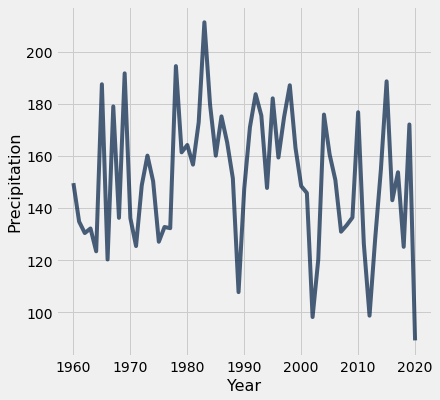

In [36]:
# Just run this cell
totals.plot("Year", "Precipitation")

This plot isn't very revealing. Each year has a different amount of precipitation, and there is quite a bit of variability across years, as if each year's precipitation is a random draw from a distribution of possible outcomes. 

Could it be that these so-called "drought conditions" from 2002-2005 and 2012-2020 can be explained by chance? In other words, could it be that the annual precipitation amounts in the Southwest for these drought years are like **random draws from the same underlying distribution** as for other years? Perhaps nothing about the Earth's precipitation patterns has really changed, and the Southwest U.S. just happened to experience a few dry years close together. 

To assess this idea, let's conduct an A/B test in which **each year's total precipitation** is an outcome, and the condition is **whether or not the year is in the EPA's drought period**.

This `drought_label` function distinguishes between drought years as described in the U.S. EPA statement above (2002-2005 and 2012-2020) and other years. Note that the label "other" is perhaps misleading, since there were other droughts before 2000, such as the massive [1988 drought](https://en.wikipedia.org/wiki/1988%E2%80%9390_North_American_drought) that affected much of the U.S. However, if we're interested in whether these modern drought periods (2002-2005 and 2012-2020) are *normal* or *abnormal*, it makes sense to distinguish the years in this way. 

In [37]:
def drought_label(n):
    """Return the label for an input year n."""
    if 2002 <= n <= 2005 or 2012 <= n <= 2020:
        return 'drought'
    else:
        return 'other'

<!-- BEGIN QUESTION -->

**Question 2.2.** Define null and alternative hypotheses for an A/B test that investigates whether drought years are drier (have less precipitation) than other years.

*Note:* Please format your answer using the following structure.

- *Null hypothesis:* ...
- *Alternative hypothesis:* ...

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->

Null hypothesis: The annual precipitation amounts in the southwest for the drought years 2002-2005 and 2012-2020 are like random draws from the same underlying distribution and any variation is due to chance. 

Alternative hypothesis: The annual precipitation amounts in the southwest for the drought years 2002-2005 and 2012-2020 are not like random draws from the same underlying distribution. The drought years 2002-2005 and 2012-2020 were actually drier and had less precipitation than other years.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3.** First, define the table `drought`. It should contain one row per year and the following two columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Precipitation"`: The sum of the total precipitation in 13 Southwest cities that year

Then, construct an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years. 

*Note*: Use the provided `bins` when creating your histogram, and do not re-assign the `southwest` table. Feel free to use as many lines as you need!

*Hint*: The optional `group` argument in a certain function might be helpful!

<!--
BEGIN QUESTION
name: q2_3
manual: true
-->

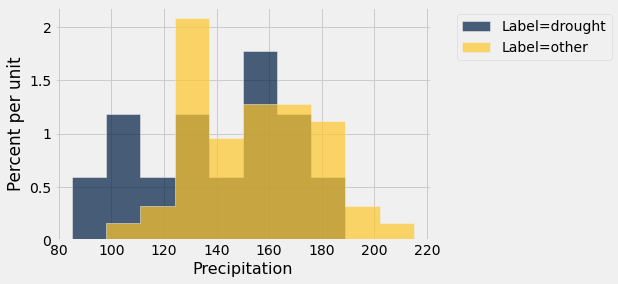

In [38]:
bins = np.arange(85, 215+1, 13)
drought = Table().with_columns('Label', totals.apply(drought_label, 'Year'),'Precipitation',totals.column(1))
#drought2=drought.group('Label', sum)
drought.hist( 'Precipitation',  bins=bins, group='Label')

In [39]:
drought.group('Label',sum)

Label,Precipitation sum
drought,1808.73
other,7439.51


<!-- END QUESTION -->



Before you continue, inspect the histogram you just created and try to guess the conclusion of the A/B test. Building intuition about the result of hypothesis testing from visualizations is quite useful for data science applications. 

**Question 2.4.** Our next step is to choose a test statistic based on our alternative hypothesis in Question 2.2. Which of the following options are valid choices for the test statistic? Assign `ab_test_stat` to an array of integers corresponding to valid choices. Assume averages and totals are taken over the total precipitation sums for each year.

1. The difference between the **total** precipitation in **drought** years and the **total** precipitation in **other** years.
2. The difference between the **total** precipitation in **others** years and the **total** precipitation in **drought** years.
3. The **absolute** difference between the **total** precipitation in others years and the **total** precipitation in drought years.
1. The difference between the **average** precipitation in **drought** years and the **average** precipitation in **other** years.
2. The difference between the **average** precipitation in **others** years and the **average** precipitation in **drought** years.
3. The **absolute** difference between the **average** precipitation in others years and the **average** precipitation in drought years.

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 0
 - 2
 - 2
-->

In [40]:
ab_test_stat = make_array(1,2,4,5)

In [41]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5.** Fellow climate scientists Will and Nicole point out that there are more **other** years than **drought** years, and so measuring the difference between total precipitation will always favor the **other** years. They conclude that all of the options above involving **total** precipitation are invalid test statistic choices. Do you agree with them? Why or why not?

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->

Will and Nicole are wrong. This is because we are using A/B testing and we will shuffle the labels. The labels “other” and “drought” will be shuffled randomly for the precipitation column. Due to this random permutation, we can use the test statistic : difference between total precipitation as a valid statistic.

<!-- END QUESTION -->



Before going on, check your `drought` table. It should have two columns `Label` and `Precipitation` with 61 rows, 13 of which are for `"drought"` years.

In [42]:
drought.show(3)

Label,Precipitation
other,149.58
other,134.82
other,130.41


In [43]:
drought.group('Label')

Label,count
drought,13
other,48


**Question 2.6.** For our A/B test, we'll use the difference between the average precipitation in drought years and the average precipitation in other years as our test statistic:

$$\text{average precipitation in "drought" years} - \text{average precipitation in "other" years}$$

First, complete the function `test_statistic`. It should take in a two-column table `t` with one row per year and two columns:
- `Label`: the label for that year (either `'drought'` or `'other'`)
- `Precipitation`: the total precipitation in the 13 Southwest cities that year. 

Then, use the function you define to assign `observed_statistic` to the observed test statistic.

<!--
BEGIN QUESTION
name: q2_6
manual: false
points:
 - 1
 - 1
 - 1
 - 1
-->

In [44]:
def test_statistic(t):
    return np.mean(t.where('Label', 'drought').column('Precipitation'))-np.mean(t.where('Label', 'other').column('Precipitation'))
    

observed_statistic = test_statistic(drought)
observed_statistic

-15.856714743589748

In [45]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Now that we have defined our hypotheses and test statistic, we are ready to conduct our hypothesis test. We’ll start by defining a function to simulate the test statistic under the null hypothesis, and then call that function 5,000 times to construct an empirical distribution under the null hypothesis.

**Question 2.7.** Write a function to simulate the test statistic under the null hypothesis. The `simulate_precipitation_null` function should simulate the null hypothesis once (not 5,000 times) and return the value of the test statistic for that simulated sample.

*Hint*: Using `t.with_column(...)` with a column name that already exists in a table `t` will replace that column with the newly specified values.

<!--
BEGIN QUESTION
name: q2_7
manual: false
points:
 - 1
 - 3
-->

In [46]:
def simulate_precipitation_null():
    shuffled_labels = drought.sample(with_replacement = False).column(0)
    original_and_shuffled = drought.with_column('Label', shuffled_labels)
    return test_statistic(original_and_shuffled)


# Run your function a couple times to make sure that it works
simulate_precipitation_null()

-0.79831730769231513

In [47]:
grader.check("q2_7")

q2_7 results: All test cases passed!

**Question 2.8.** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 5,000 values of the test statistic under the null hypothesis and store the result in the array `sampled_stats`.

*Hint:* You should use the `simulate_precipitation_null` function you wrote in the previous question!

*Note:* Running this cell may take a few seconds. If it takes more than a minute, try to find a faster way to implement your `simulate_precipitation_null` function.

<!--
BEGIN QUESTION
name: q2_8
manual: false
points:
 - 0
 - 0
 - 2
 - 2
-->

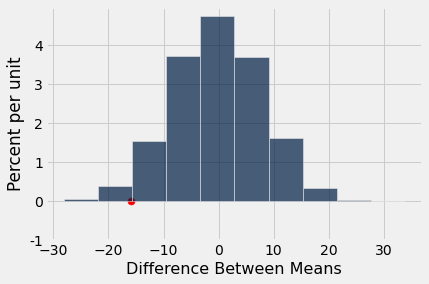

In [48]:
sampled_stats = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    sampled_stats=np.append(sampled_stats, simulate_precipitation_null())

# Do not change these lines
Table().with_column('Difference Between Means', sampled_stats).hist()
plt.scatter(observed_statistic, 0, c="r", s=50);
plt.ylim(-0.01);

In [49]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Compute the p-value for this hypothesis test, and assign it to the variable `precipitation_p_val`.

<!--
BEGIN QUESTION
name: q2_9
manual: false
points:
 - 0
 - 1
 - 3
-->

In [50]:
precipitation_p_val = np.count_nonzero(sampled_stats <= observed_statistic) / repetitions
precipitation_p_val

0.0264

In [51]:
grader.check("q2_9")

q2_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.10.** State a conclusion from this test using a p-value cutoff of 5%. What have you learned about the EPA's statement on drought?

<!--
BEGIN QUESTION
name: q2_10
manual: true
-->

Using a p-value cut-off of 5%, we are able to reject the null hypothesis since the p-value we obtained for this hypothesis test is 2.94%, which is smaller than the cut-off. We learn that EPA's statement on drought is true because out null hypothesis statement is rejected.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.11.** Does your conclusion from Question 2.10 apply to the entire Southwest region of the U.S.? Why or why not?

<!--
BEGIN QUESTION
name: q2_11
manual: true
-->

Although we only sampled from 13 cities within the region, our conclusion from question 2.10 applies to the entire Southwest. This is because the population parameter used for this A/B testing is representative of the whole population and therefore any conclusion drawn from this parameter is applicable to that population, which is the Southwest region of the U.S in this particular case.

<!-- END QUESTION -->



# Conclusion

Data science plays a central role in climate change research because massive simulations of the Earth's climate are necessary to assess the implications of climate data recorded from weather stations, satellites, and other sensors. [Berkeley Earth](http://berkeleyearth.org/data/) is a common source of data for these kinds of projects.

In this project, we found ways to apply our statistical inference technqiues that rely on random sampling even in situations where the data were not generated randomly, but instead by some complicated natural process that appeared random. We made assumptions about randomness and then came to conclusions based on those assumptions. Great care must be taken to choose assumptions that are realistic, so that the resulting conclusions are not misleading. However, making assumptions about data can be productive when doing so allows inference techniques to apply to novel situations.

<img src="heidi.jpg" alt="drawing" width="350"/>

**Congratulations -- Heidi says you're done with the project!**



***Important Reminders:***

- If you worked on Project 2 with a partner, please remember to add your partner to your Gradescope submission. If you resubmit, make sure to re-add your partner, as Gradescope does not save any partner information.
- Make sure to wait until the autograder finishes running to ensure that your submission was processed properly and that you submitted to the correct assignment.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [58]:
grader.check_all()

q1_1_3 results: All test cases passed!

q1_1_4 results: All test cases passed!

q1_1_5 results: All test cases passed!

q1_2_1 results: All test cases passed!

q1_2_2 results: All test cases passed!

q1_2_5 results: All test cases passed!

q1_2_6 results: All test cases passed!

q1_2_8 results: All test cases passed!

q2_1 results: All test cases passed!

q2_4 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

q2_9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)